# Importing Libraries

In [6]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
import joblib

# Creatig Dataset

In [7]:
rows = 1000

Personal_Vehicle_Km = np.random.normal(0, 40, rows)   # Daily , Range = [0,40]
Public_Vehicle_Km = np.random.normal(0, 40, rows)     # Daily , Range = [0,40]
Plane_Journey_Count = np.random.randint(0, 11, rows)   # Monthly , Range = [1,10]
Train_Journey_Count = np.random.randint(0, 11, rows)   # Monthly , Range = [1,10]
Electricity_Kwh = np.random.normal(100, 200, rows)    # Monthly , Range = [100,200]
Water_Usage_Liters = np.random.normal(20, 135, rows)  # Daily, Range = [20,135]
Diet_Type = np.random.choice(
    ['Veg', 'NonVeg', 'Both', 'MostlyVeg', 'MostlyNonVeg'], rows
)  # weekly diet types
Waste_Kg = np.random.uniform(0.34, 0.50, rows)         # Daily, Range = [0.34,0.50]


diet_map = {
    'Veg': 0.8,
    'MostlyVeg': 1.0,
    'Both': 1.3,
    'MostlyNonVeg': 1.6,
    'NonVeg': 2.0
}
Diet_effect = np.array([diet_map[d] for d in Diet_Type])

# Calculate carbon footprint (synthetic formula)
Carbon_Footprint_Kg = (
    (0.21 * Personal_Vehicle_Km) + 
    (0.12 * Public_Vehicle_Km) + 
    (Plane_Journey_Count * 30 * 0.15) +   
    (Train_Journey_Count * 10 * 0.1) + 
    (0.45 * (Electricity_Kwh / 30)) +     
    (0.001 * Water_Usage_Liters) + 
    (0.5 * Waste_Kg) +
    Diet_effect +
    np.random.normal(0, 2, rows)          # add small random noise
)

# Create DataFrame
df = pd.DataFrame({
    "Personal_Vehicle_Km": Personal_Vehicle_Km,
    "Public_Vehicle_Km": Public_Vehicle_Km,
    "Plane_Journey_Count": Plane_Journey_Count,
    "Train_Journey_Count": Train_Journey_Count,
    "Electricity_Kwh": Electricity_Kwh,
    "Water_Usage_Liters": Water_Usage_Liters,
    "Diet_Type": Diet_Type,
    "Waste_Kg": Waste_Kg,
    "Carbon_Footprint_Kg": Carbon_Footprint_Kg
})


In [8]:
df.sample(5)

,Personal_Vehicle_Km,Public_Vehicle_Km,Plane_Journey_Count,Train_Journey_Count,Electricity_Kwh,Water_Usage_Liters,Diet_Type,Waste_Kg,Carbon_Footprint_Kg
956,-72.608879,41.612208,1,7,-56.083445,-74.268479,NonVeg,0.378624,2.330512
345,-55.510513,-13.657699,8,1,-131.173435,132.083011,MostlyNonVeg,0.379524,23.760804
57,-52.138346,-20.032072,2,1,-185.939724,117.854516,Veg,0.390449,-0.471758
880,-7.958356,34.836112,6,0,32.320383,-186.012622,MostlyVeg,0.402880,33.260885
314,25.578389,57.601442,4,10,-58.467030,-53.754245,MostlyVeg,0.438165,38.632769


# Basic Exploration

In [9]:
# Basic Exploration

print("Information : \n")
print(df.info())

print("\nMissing Values : \n")
print(df.isnull().sum())

print("\nDupliacte Entries : \n")
print(df.duplicated().sum())

Information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Personal_Vehicle_Km  1000 non-null   float64
 1   Public_Vehicle_Km    1000 non-null   float64
 2   Plane_Journey_Count  1000 non-null   int32  
 3   Train_Journey_Count  1000 non-null   int32  
 4   Electricity_Kwh      1000 non-null   float64
 5   Water_Usage_Liters   1000 non-null   float64
 6   Diet_Type            1000 non-null   object 
 7   Waste_Kg             1000 non-null   float64
 8   Carbon_Footprint_Kg  1000 non-null   float64
dtypes: float64(6), int32(2), object(1)
memory usage: 62.6+ KB
None

Missing Values : 

Personal_Vehicle_Km    0
Public_Vehicle_Km      0
Plane_Journey_Count    0
Train_Journey_Count    0
Electricity_Kwh        0
Water_Usage_Liters     0
Diet_Type              0
Waste_Kg               0
Carbon_Footprint_Kg    0
dtype: int64

Du

# Exploratory Data Analysis (EDA)

## Univariet Analysis

### Personal_vehicle_Km - float

<Axes: xlabel='Personal_Vehicle_Km', ylabel='Count'>

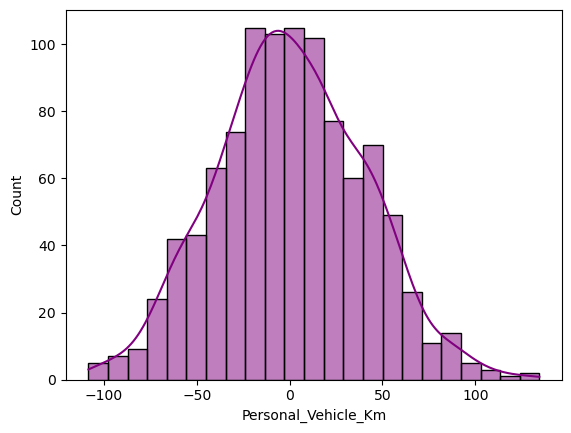

In [10]:
sns.histplot(data = df, x = 'Personal_Vehicle_Km', kde = True, color = 'purple')

### Public_Vehicle_Km - float

<Axes: xlabel='Public_Vehicle_Km', ylabel='Count'>

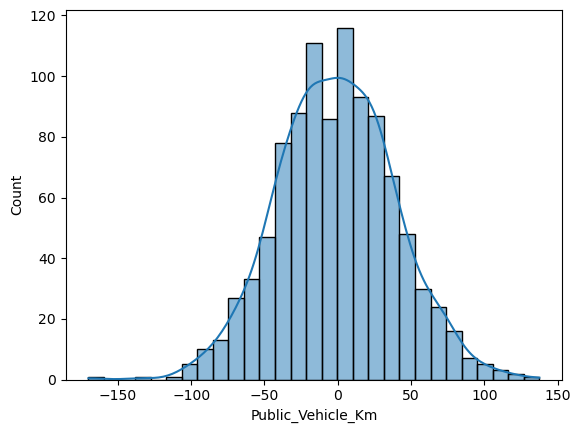

In [11]:
sns.histplot(data = df, x = 'Public_Vehicle_Km', kde = True)

### Plane_Journey_Count - int

<Axes: xlabel='Plane_Journey_Count', ylabel='count'>

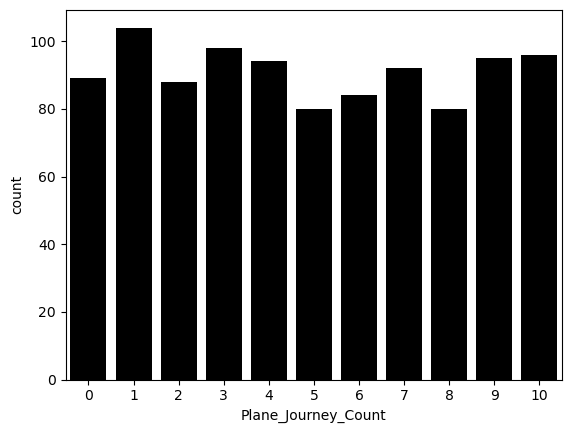

In [12]:
sns.countplot(data = df, x = 'Plane_Journey_Count',color = 'black')

### Train_Journey_Count - int

<Axes: xlabel='Train_Journey_Count', ylabel='count'>

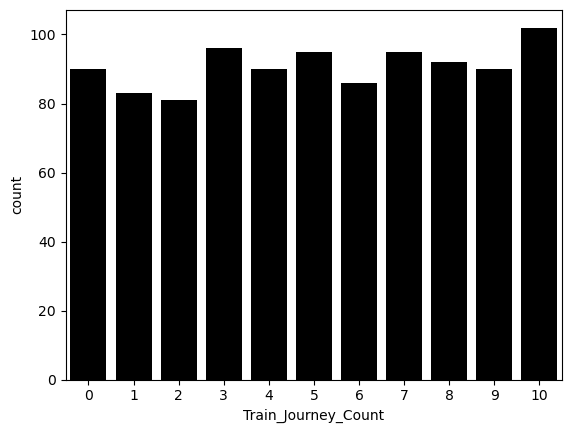

In [13]:
sns.countplot(data = df, x = 'Train_Journey_Count',color ='black')

### Electricity_Kwh - float

<Axes: xlabel='Electricity_Kwh', ylabel='Count'>

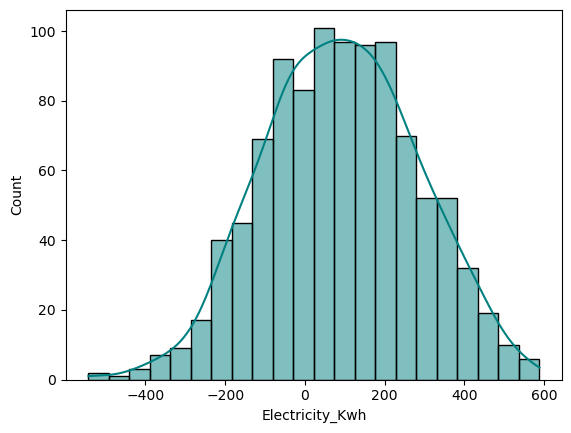

In [14]:
sns.histplot(data = df, x = 'Electricity_Kwh', kde = True, color = 'teal')

### Water_Usage_Litres - float

<Axes: xlabel='Water_Usage_Liters', ylabel='Count'>

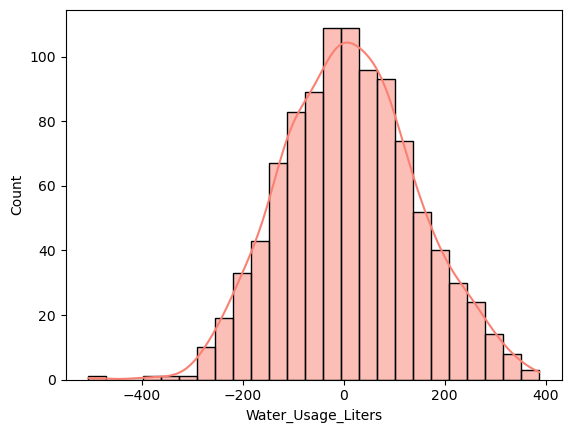

In [15]:
sns.histplot(data = df, x = 'Water_Usage_Liters', kde = True, color = "salmon")

### Diet_Type - Object

<Axes: xlabel='Diet_Type', ylabel='count'>

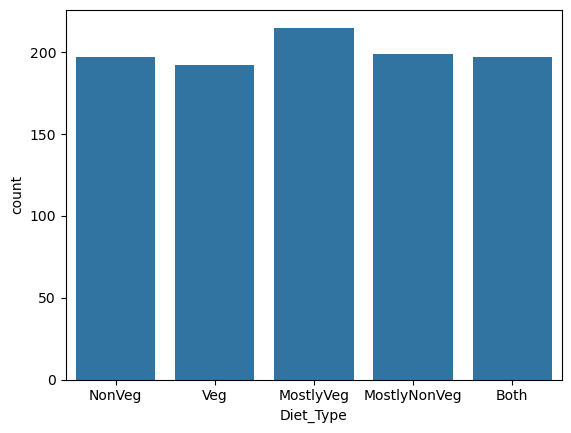

In [16]:
sns.countplot(data = df, x = 'Diet_Type')

### Waste_Kg - float

<Axes: xlabel='Waste_Kg', ylabel='Count'>

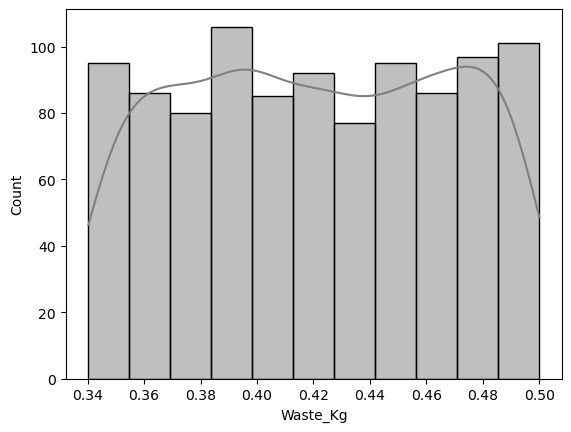

In [17]:
sns.histplot(data = df, x = 'Waste_Kg',kde = True, color = 'grey')

### Carbon_Footprint_kg - float (Target)

<Axes: xlabel='Carbon_Footprint_Kg', ylabel='Count'>

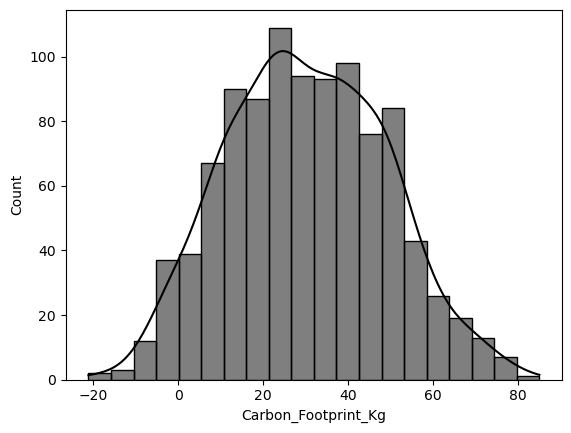

In [18]:
sns.histplot(data = df, x = 'Carbon_Footprint_Kg', kde = True, color = 'Black')

## Bivariet Analysis

In [19]:
float_columns = ['Personal_Vehicle_Km',
 'Public_Vehicle_Km',
 'Electricity_Kwh',
 'Water_Usage_Liters',
 'Waste_Kg']

### Scatter plots - Target Vs float columns

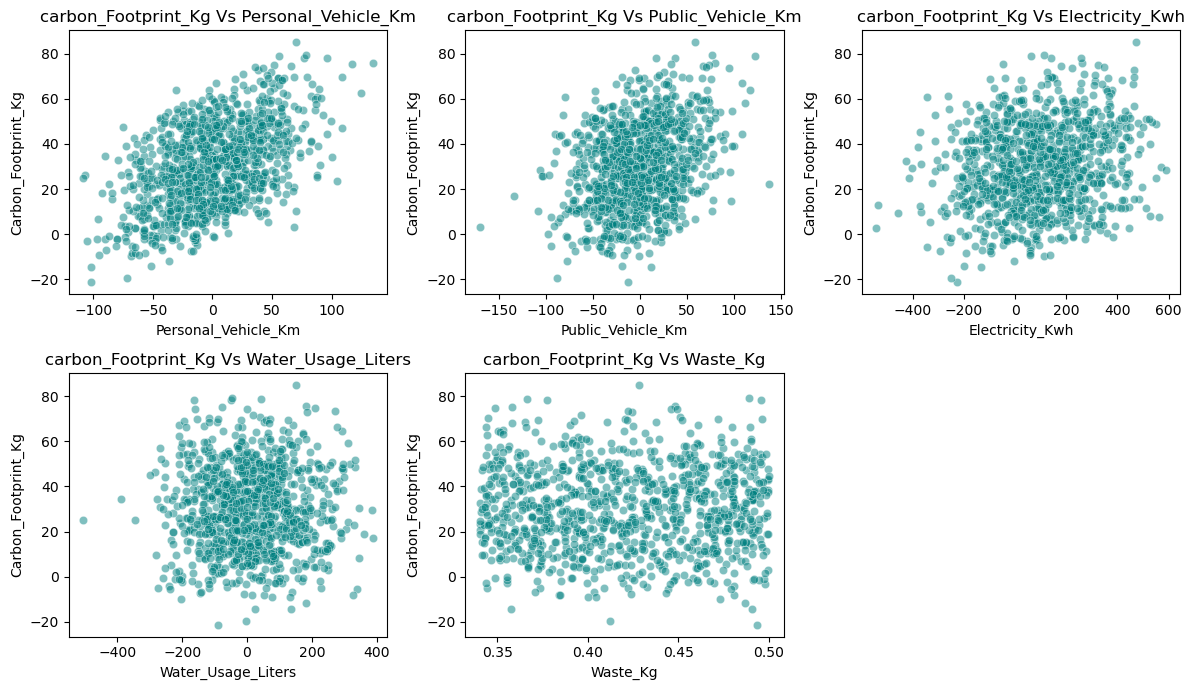

In [20]:
plt.figure(figsize = (12,7))

n = 0

for col in float_columns:
    n = n+1
    plt.subplot(2,3,n)
    sns.scatterplot(data = df, x = col, y = 'Carbon_Footprint_Kg',color = 'teal',alpha = 0.5)
    plt.title(f'carbon_Footprint_Kg Vs {col}')

plt.tight_layout()
plt.show()

### Histplot - Carbon_Footprint_Kg VS Diet_Type

<Axes: xlabel='Carbon_Footprint_Kg', ylabel='Count'>

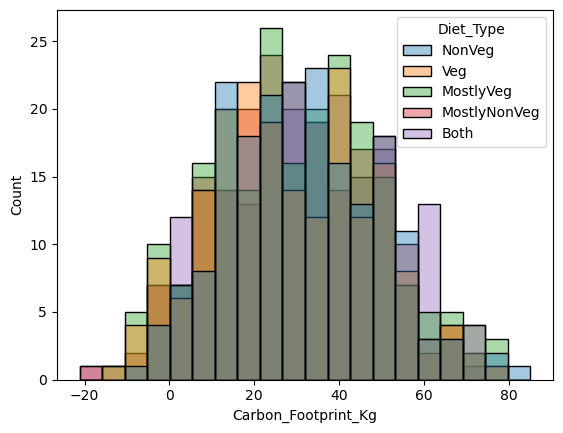

In [21]:
sns.histplot(data = df, hue = 'Diet_Type', x = 'Carbon_Footprint_Kg', alpha = 0.4)

## Multivariet Analysis

<Axes: >

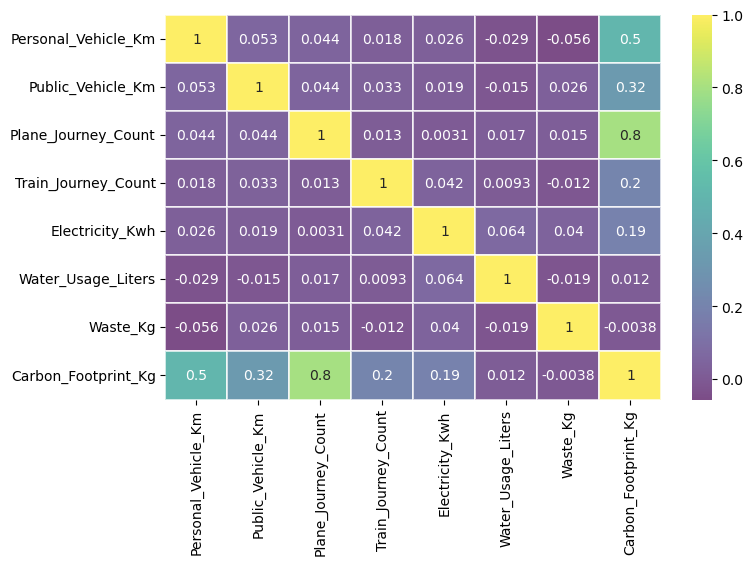

In [22]:
plt.figure(figsize = (8,5))
corr = df.corr(numeric_only = True)

sns.heatmap(corr, linewidth = 0.2,annot = True, cmap = 'viridis',alpha = 0.7)

# Splitting the data 

In [23]:
x = df.drop('Carbon_Footprint_Kg',axis = 1)
y = df['Carbon_Footprint_Kg']

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.2,
                                                random_state = 20)

In [25]:
print(f'x_train  shape {x_train.shape}')
print(f'y_train  shape {y_train.shape}')
print(f'x_test  shape {x_test.shape}')
print(f'y_test  shape {y_test.shape}')

x_train  shape (800, 8)
y_train  shape (800,)
x_test  shape (200, 8)
y_test  shape (200,)


# Data Preprocessing

In [26]:
sta_scaler = ('standard_scaler',
              StandardScaler(),
              ['Personal_Vehicle_Km','Public_Vehicle_Km','Electricity_Kwh','Water_Usage_Liters','Waste_Kg'])

minmax_scaler = ('minmax_scaler',
                 MinMaxScaler(),
                 ['Plane_Journey_Count','Train_Journey_Count'])

ordinal_encode = ('ordinal_encoder',
                  OrdinalEncoder(categories = [['Veg','MostlyVeg','Both','MostlyNonVeg','NonVeg']]),
                  ['Diet_Type'])

In [27]:
trf1 = ColumnTransformer(transformers = [
    sta_scaler,
    minmax_scaler,
    ordinal_encode
],remainder = 'passthrough')

# Model  - Elastic Net

In [28]:
from sklearn.linear_model import ElasticNet

## Model Object

In [43]:
model = ElasticNet(alpha = 0.01,l1_ratio = 0.5)

In [44]:
pipe = make_pipeline(trf1,model)

## Model Training

In [45]:
pipe.fit(x_train,y_train)

,steps,"[('columntransformer', ...), ('elasticnet', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('standard_scaler', ...), ('minmax_scaler', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Model Prediction

In [39]:
y_pred_model = pipe.predict(x_test)

## Model Evaluation

In [40]:
print("R2 Score : ",r2_score(y_test,y_pred_model))
print("MSE : ",mean_squared_error(y_test,y_pred_model))

R2 Score :  0.9844614226143807
MSE :  5.599522268527057


# Residuals Vs predicted

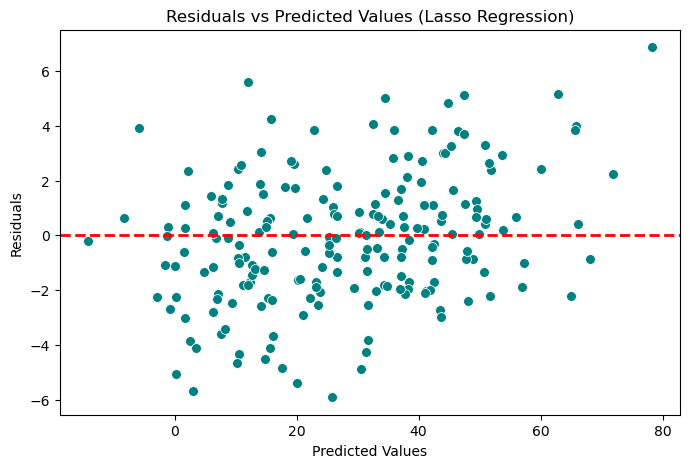

In [41]:
# Calculate residuals

residuals = y_test - y_pred_model

# Plot residuals vs predictions
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_model, y=residuals, color='teal', s=50)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs Predicted Values (Lasso Regression)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Feature Importance

Text(0.5, 1.0, 'Feature importance')

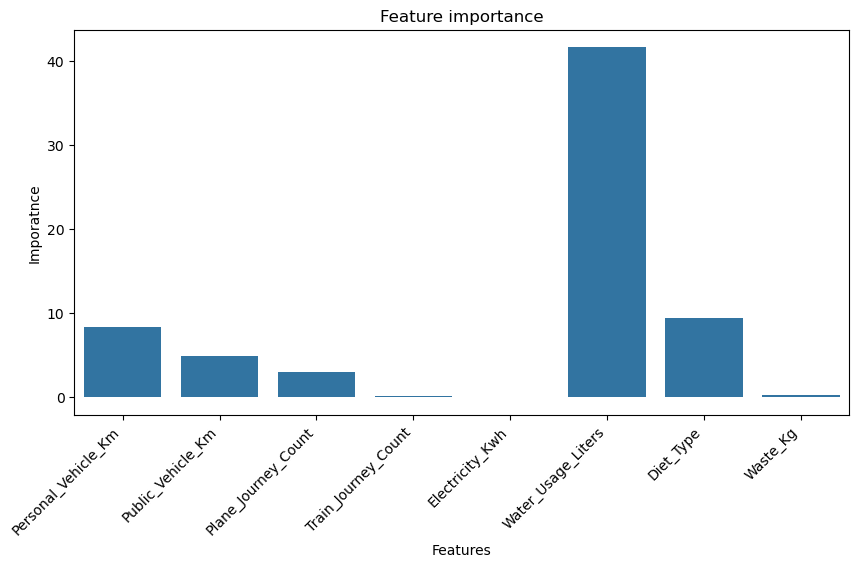

In [42]:
plt.figure(figsize = (10,5))
sns.barplot(x = x_train.columns,y = model.coef_)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Features")
plt.ylabel("Imporatnce")
plt.title("Feature importance")